# Avaliação de Treinamento com People Analytics


Para avaliar a eficácia de um treinamento, podemos utilizar uma abordagem baseada em dados dos funcionários. Esta metodologia permite quantificar objetivamente o impacto do treinamento.

Utilizaremos um desenho de pesquisa pré e pós-teste com o mesmo grupo trabalhadores, medindo seu desempenho antes e depois do treinamento.


> Como fazer isso?

Essa é a função do teste t pareado. O teste t pareado, também chamado de teste t para amostras dependentes (quando os dados estão relacionados ou conectados), é uma análise estatística utilizada para comparar as médias de duas condições ou momentos distintos dentro do mesmo grupo. Ele é especialmente útil em estudos que avaliam mudanças ao longo do tempo, como antes e depois de uma intervenção.


A principal premissa do teste é que as amostras são dependentes, ou seja, os dados vêm dos mesmos indivíduos em diferentes momentos. Ele verifica se a diferença média entre as duas condições é estatisticamente significativa, levando em conta a variabilidade dos dados.



> Como operacionalizar o test t pareado?

O gestor de pessoas quer saber se um programa de treinamento aumentou o desempenho da equipe. Quais etapas para verificação?


*   Coletar dados: mede o desempenho de X funcionários antes e depois do programa de treinamento.

*   Calcular a diferença: para cada funcionário, subtrai o desempenho antes e depois do treinamento.

*   Executar o teste t pareado: usa os dados das diferenças para calcular o valor de p para verificar a significância estatística do teste.

*   Interpretar os resultados: se o valor de p for menor que 0,05, conclui que houve um aumento significativo no desempenho após o treinamento.









In [4]:
# Vamos gerar dados aleatórios de 200 funcionários de uma empresa.
import numpy as np
import pandas as pd

# parâmetros
np.random.seed(2025)
n_funcionarios = 200
primeiros_nomes = [
    "Alex", "Bianca", "Carlos", "Diana", "Eduardo", "Fernanda", "Gabriel", "Helena",
    "Isabela", "João", "Karen", "Lucas", "Marina", "Nicolas", "Olivia", "Paulo",
    "Renata", "Sérgio", "Tatiana", "Victor"
]
ultimos_nomes = [
    "Almeida", "Barbosa", "Cardoso", "Dias", "Esteves", "Farias", "Gomes", "Henriques",
    "Ibrahim", "Junqueira", "Klein", "Lopes", "Moura", "Novaes", "Oliveira", "Pereira",
    "Queiroz", "Rezende", "Silva", "Teixeira"
]
niveis_de_educacao = ["Ensino Médio", "Graduação", "Mestrado", "Doutorado"]
departamentos = [
    "Finanças", "Recursos Humanos", "Operações", "Vendas", "Tecnologia da Informação",
    "Marketing", "Pesquisa e Desenvolvimento", "Atendimento ao Cliente"
]

def nome_aleatorio():
    return f"{np.random.choice(primeiros_nomes)} {np.random.choice(ultimos_nomes)}"

nomes = [nome_aleatorio() for _ in range(n_funcionarios)]
educacao = np.random.choice(niveis_de_educacao, size=n_funcionarios, p=[0.25, 0.45, 0.25, 0.05])
departamento = np.random.choice(departamentos, size=n_funcionarios)
pontuacoes_pre_treinamento = np.clip(np.random.normal(loc=70, scale=10, size=n_funcionarios), 0, 100)
pontuacoes_pos_treinamento = np.clip(pontuacoes_pre_treinamento + np.random.normal(loc=5, scale=5, size=n_funcionarios), 0, 100)

df_corporativo = pd.DataFrame({
    "nome_do_funcionario": nomes,
    "nivel_de_educacao": educacao,
    "departamento": departamento,
    "pontuacao_pre_treinamento": pontuacoes_pre_treinamento.round(1),
    "pontuacao_pos_treinamento": pontuacoes_pos_treinamento.round(1)
})



In [5]:
# prompt: imprimir linhas iniciais df_corporativo

print(df_corporativo.head())


  nome_do_funcionario nivel_de_educacao            departamento  \
0       Tatiana Moura      Ensino Médio                Finanças   
1      Diana Teixeira         Graduação  Atendimento ao Cliente   
2      Marina Almeida          Mestrado        Recursos Humanos   
3      Fernanda Klein          Mestrado               Operações   
4      Olivia Barbosa          Mestrado               Operações   

   pontuacao_pre_treinamento  pontuacao_pos_treinamento  
0                       66.1                       64.7  
1                       50.2                       50.8  
2                       78.5                       90.8  
3                       62.7                       72.4  
4                       64.6                       70.4  


Será que houve mudança no desempenho dos profissionais após o treinamento?



In [6]:
# prompt: Estatística descritiva

pre_mean = df_corporativo["pontuacao_pre_treinamento"].mean()
post_mean = df_corporativo["pontuacao_pos_treinamento"].mean()
improvement = df_corporativo["pontuacao_pos_treinamento"] - df_corporativo["pontuacao_pre_treinamento"]
impr_mean = improvement.mean()
impr_std = improvement.std(ddof=1)

print(f"Pontuação média antes do treinamento: {pre_mean:.2f}")
print(f"Pontuação média após o treinamento: {post_mean:.2f}")
print(f"Melhora média nas pontuações: {impr_mean:.2f}")
print(f"Desvio padrão da melhora: {impr_std:.2f}")


Pontuação média antes do treinamento: 69.98
Pontuação média após o treinamento: 74.80
Melhora média nas pontuações: 4.81
Desvio padrão da melhora: 5.12


In [7]:
# prompt: aplicar o t-test & Wilcoxon signed-rank

from scipy import stats

t_stat, p_val = stats.ttest_rel(df_corporativo["pontuacao_pos_treinamento"], df_corporativo["pontuacao_pre_treinamento"])
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(df_corporativo["pontuacao_pos_treinamento"], df_corporativo["pontuacao_pre_treinamento"])

print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.3f}")
print(f"Wilcoxon signed-rank test: statistic = {wilcoxon_stat:.0f}, p-value = {wilcoxon_p:.3f}")


Paired t-test: t-statistic = 13.29, p-value = 0.000
Wilcoxon signed-rank test: statistic = 1886, p-value = 0.000


Vamos analisar os resultados

1. Teste t pareado (Paired t-test)
t-statistic = 13.29: Esse valor indica o tamanho da diferença relativa entre as médias antes e depois do treinamento. Quanto maior o valor absoluto, maior a diferença detectada.

p-value = 0.000: Um p-valor tão pequeno (menor que 0.05) sugere que há uma diferença estatisticamente significativa entre as médias pré e pós-treinamento. Isso significa que a melhoria no desempenho não ocorreu por acaso.

2. Teste de Wilcoxon (Wilcoxon signed-rank test)
statistic = 1886: Esse é o valor do teste de Wilcoxon, que mede mudanças na distribuição dos dados.

p-value = 0.000: Assim como no teste t pareado, esse valor confirma uma diferença significativa entre os dados antes e depois do treinamento.


Ambos os testes indicam que o desempenho dos funcionários melhorou após o treinamento. O teste t pareado é mais sensível a diferenças na média, enquanto o Wilcoxon é robusto para dados que não seguem uma distribuição normal. Como ambos os testes indicam um resultado significativo, pode-se concluir com confiança que houve um impacto real do treinamento.

In [10]:
# prompt: realizar o teste de Cohen e verificar o intervalo de confiança


# Cohen's d (paired)
cohen_d = impr_mean / impr_std
print(f"Cohen's d: {cohen_d:.2f}")

# 95% intervalo de confiânça para a melhoria da média (t distribution)
from scipy.stats import t
n = len(improvement)
ci_low, ci_high = t.interval(0.95, df=n-1, loc=impr_mean, scale=impr_std/np.sqrt(n))
print(f"95% para a melhoria da média: [{ci_low:.2f}, {ci_high:.2f}]")



Cohen's d: 0.94
95% para a melhoria da média: [4.10, 5.52]


O d de Cohen é uma medida de tamanho de efeito que quantifica a diferença entre duas médias em termos de desvios padrão. Ele ajuda a entender a magnitude da diferença entre dois grupos ou condições.

Interpretação do valor 0.94:

* Pequeno: 0.2 a 0.49

* Médio: 0.5 a 0.79

* Grande: 0.8 ou mais

Com um d de Cohen de aproximadamente 0.94, isso indica um tamanho de efeito grande do treinamento realizado.

O intervalo de confiança de 95% para a melhoria da média [4.10, 5.52] indica que, com alta certeza estatística, a melhora média no desempenho após o treinamento está dentro desse intervalo. Isso significa que, se repetíssemos esse estudo várias vezes, em 95% dos casos, a melhoria média estaria entre 4.10 e 5.52 pontos.

In [12]:
# Criar um dataset resumo com os resultados dos testes realizados

import pandas as pd

summary_df = pd.DataFrame({
    "Métrica": ["Média antes", "Média depois", "Melhora média", "Desvio padrão da melhora",
               "t pareado", "p-valor (t)", "Estatística de Wilcoxon", "p-valor (Wilcoxon)",
               "d de Cohen", "IC 95% inferior", "IC 95% superior"],
    "Valor": [pre_mean, post_mean, impr_mean, impr_std,
              t_stat, p_val, wilcoxon_stat, wilcoxon_p,
              cohen_d, ci_low, ci_high]
})
display_dataframe_to_user("Estatísticas Gerais", summary_df)


## Estatísticas Gerais


,Métrica,Valor
0,Média antes,6.998450e+01
1,Média depois,7.479500e+01
2,Melhora média,4.810500e+00
3,Desvio padrão da melhora,5.119707e+00
4,t pareado,1.328802e+01
5,p-valor (t),2.933810e-29
6,Estatística de Wilcoxon,1.886000e+03
7,p-valor (Wilcoxon),3.632625e-23
8,d de Cohen,9.396046e-01
9,IC 95% inferior,4.096616e+00


<ipython-input-16-7d422ab610c5>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_corporativo["pontuacao_pre_treinamento"], df_corporativo["pontuacao_pos_treinamento"]], labels=["Pre", "Post"])


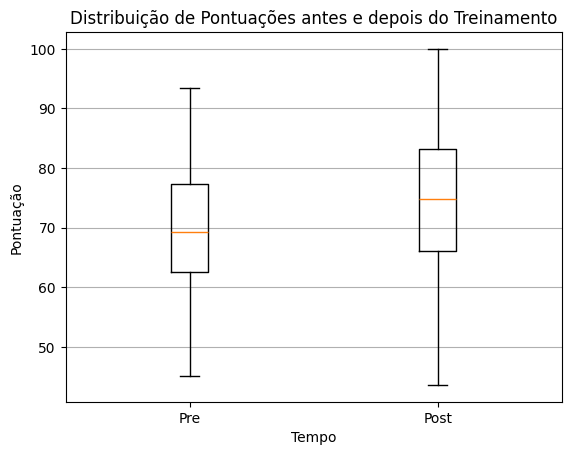

In [16]:
# prompt: Boxplot pre vs post treinamento

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot([df_corporativo["pontuacao_pre_treinamento"], df_corporativo["pontuacao_pos_treinamento"]], labels=["Pre", "Post"])
plt.title("Distribuição de Pontuações antes e depois do Treinamento")
plt.xlabel("Tempo")
plt.ylabel("Pontuação")
plt.grid(axis="y")
plt.show()



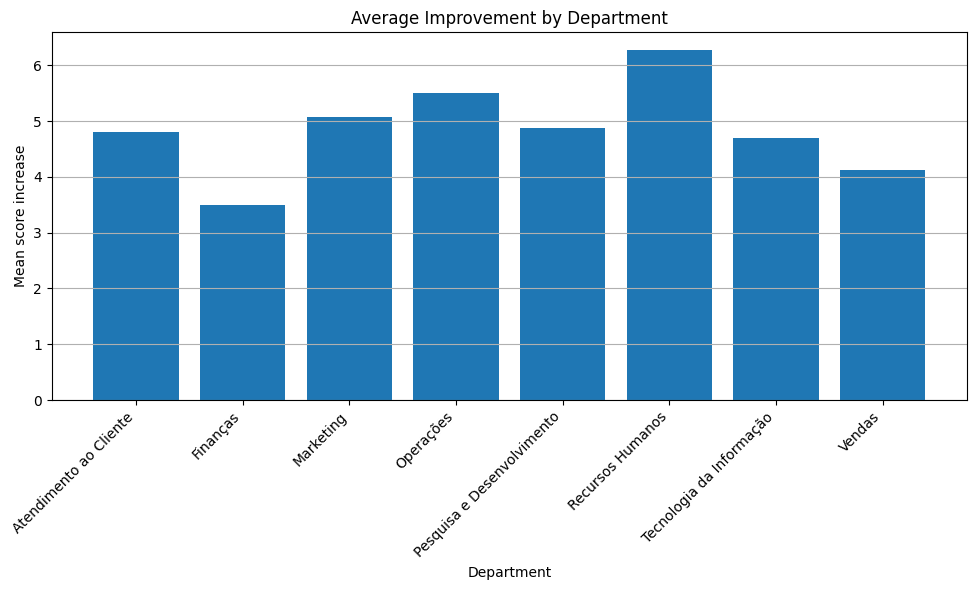

In [22]:
# prompt: Bar chart da melhoria por departamento


import matplotlib.pyplot as plt

dept_stats = df_corporativo.groupby("departamento")[["pontuacao_pos_treinamento", "pontuacao_pre_treinamento"]].mean()
dept_stats["mean_improvement"] = dept_stats["pontuacao_pos_treinamento"] - dept_stats["pontuacao_pre_treinamento"]
dept_stats = dept_stats.reset_index()
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.bar(dept_stats["departamento"], dept_stats["mean_improvement"])
plt.title("Average Improvement by Department")
plt.ylabel("Mean score increase")
plt.xlabel("Department") # Add x-axis label
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Com base nos resultados, verifica-se que o investimento em treinamento dos funcionários foi positivo e justificado.